## PERCS Analysis Notebook

Started 5 Dec 2022

Notess:
- 5 Dec 

In [1]:
import os
import re
import warnings
import numpy as np
import pandas as pd
import sympy as sym
from os.path import join
from six import iteritems
import matplotlib.pyplot as plt
import csv
from scipy import stats
from sklearn import cluster, metrics, decomposition # these will be useful
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt


### FOrming Percs Dataframe

In [2]:
data_dir = os.path.abspath("data")
dir = os.path.abspath("")

In [3]:
data_dir

'c:\\Users\\sicil\\LiverModel\\data'

In [4]:
csv_percs = os.path.join(data_dir,"percs_df.csv")
og_percs_df = pd.read_csv(csv_percs,index_col="RXN")
csv_percs


'c:\\Users\\sicil\\LiverModel\\data\\percs_df.csv'

In [5]:
percs_df = og_percs_df.copy()

Log transforming it

In [6]:
percs_df.index

Index(['kf_HEX1', 'kf_PGI', 'kf_FBP', 'kf_PFK', 'kf_FBA', 'kf_TPI', 'kf_GAPD',
       'kf_PGK', 'kf_PGM', 'kf_ENO', 'kf_PYK', 'kf_LDH_L', 'kf_ATPM',
       'kf_NADHM'],
      dtype='object', name='RXN')

In [7]:
percs_df = percs_df.drop(percs_df.iloc[:, 1000:4000], axis = 1)

In [8]:
percs_df

OG          No.0          No.1          No.2  \
RXN                                                                
kf_HEX1   2.018015e+04  4.258354e+03  2.940531e+03  1.996763e+03   
kf_PGI    5.880895e+03  5.511449e+02  5.168686e+02  6.340910e+03   
kf_FBP    1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
kf_PFK    3.197816e+06  1.377600e+05  1.210078e+07  5.624837e+06   
kf_FBA    1.943647e+04  2.257384e+04  8.439185e+03  1.931098e+04   
kf_TPI    6.486470e+03  9.195787e+02  2.936766e+03  3.740340e+03   
kf_GAPD   5.434709e+09  6.101805e+08  3.258215e+08  2.241215e+08   
kf_PGK    2.530817e+09  4.460508e+09  4.152088e+09  6.502157e+07   
kf_PGM    2.803163e+03  2.582658e+03  7.266611e+02  2.617806e+02   
kf_ENO    2.038713e+04  1.817571e+04  5.460263e+03  1.495655e+03   
kf_PYK    3.622458e+06  3.369665e+07  3.496006e+07  2.749117e+05   
kf_LDH_L  1.671991e+05  4.194663e+04  2.250260e+04  7.206563e+03   
kf_ATPM   4.230883e+02  1.091579e+02  2.397136e+02  9.076096e+01   
kf_NADHM  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   

                  No.3          No.4          No.5          No.6  \
RXN                                                                
kf_HEX1   2.278241e+03  6.728423e+04  1.414944e+04  1.296080e+05   
kf_PGI    6.306921e+03  9.601131e+03  7.230486e+03  8.950118e+02   
kf_FBP    1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
kf_PFK    4.528822e+06  1.296254e+07  4.327022e+06  1.465452e+07   
kf_FBA    3.764272e+03  5.964158e+04  1.768405e+04  9.531945e+03   
kf_TPI    2.157476e+03  1.902437e+03  6.393250e+02  1.592953e+03   
kf_GAPD   1.021928e+09  2.701030e+10  3.044747e+09  2.348937e+08   
kf_PGK    8.100133e+08  3.155932e+09  3.541881e+09  3.786175e+09   
kf_PGM    7.086623e+03  3.701094e+03  1.011620e+04  2.034944e+02   
kf_ENO    4.033576e+04  2.298698e+04  6.245223e+04  1.419969e+03   
kf_PYK    9.005344e+06  9.417005e+06  4.462273e+06  3.930832e+07   
kf_LDH_L  1.813559e+05  1.713852e+06  5.098958e+04  6.031654e+03   
kf_ATPM   7.709488e+01  1.867524e+02  2.341643e+02  8.363809e+02   
kf_NADHM  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   

                  No.7          No.8  ...       No.4990       No.4991  \
RXN                                   ...                               
kf_HEX1   8.693189e+05  2.434222e+05  ...  2.105130e+03  4.649164e+03   
kf_PGI    3.438222e+03  2.131030e+03  ...  4.273827e+02  5.787588e+02   
kf_FBP    1.000000e+05  1.000000e+05  ...  1.000000e+05  1.000000e+05   
kf_PFK    4.166935e+07  2.691073e+07  ...  4.678343e+06  3.851228e+06   
kf_FBA    9.724054e+03  3.348939e+03  ...  3.235229e+04  4.949633e+04   
kf_TPI    6.873179e+02  1.351270e+03  ...  1.333399e+03  2.997531e+03   
kf_GAPD   1.371384e+09  9.393502e+08  ...  2.955646e+08  3.186582e+09   
kf_PGK    3.863429e+10  1.300681e+10  ...  1.573125e+09  6.929308e+09   
kf_PGM    1.950353e+02  1.871641e+02  ...  1.921693e+02  3.338922e+02   
kf_ENO    1.401847e+03  1.361544e+03  ...  1.623394e+03  2.734521e+03   
kf_PYK    7.665968e+07  1.072275e+07  ...  7.254066e+05  1.888487e+06   
kf_LDH_L  9.465114e+05  8.539977e+05  ...  1.457756e+04  4.319856e+05   
kf_ATPM   2.590955e+03  7.627139e+02  ...  7.263802e+01  1.050089e+02   
kf_NADHM  1.000000e+05  1.000000e+05  ...  1.000000e+05  1.000000e+05   

               No.4992       No.4993       No.4994       No.4995  \
RXN                                                                
kf_HEX1   2.460805e+03  4.409023e+03  6.616226e+04  1.701004e+04   
kf_PGI    8.657329e+02  6.498446e+03  1.824487e+04  6.193030e+03   
kf_FBP    1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
kf_PFK    1.660424e+06  5.964869e+06  1.978505e+07  5.775647e+06   
kf_FBA    3.926027e+04  2.267309e+04  1.574766e+04  1.479954e+04   
kf_TPI    3.102558e+03  2.886951e+03  7.500419e+02  1.653360e+03   
kf_GAPD   1.040752e+10  6.052996e+09  3.129107e+09  5.613800e+09   
kf_PGK    2.054514e+09  1.642624e+09  9.189568e+09  4.258858e

In [9]:
# making a smaller vrsion of df
# for i in percs_df.columns:
#     temp = percs_df.columns.get_loc(i)
#     if temp % 5 != 0:
#         percs_df.drop(df.columns[temp], axis = 1)
#         # print(i)
#         print(temp)


# percs_df


In [10]:
data_log = np.log(percs_df)
data_log

OG       No.0       No.1       No.2       No.3       No.4  \
RXN                                                                          
kf_HEX1    9.912455   8.356638   7.986346   7.599283   7.731159  11.116681   
kf_PGI     8.679464   6.311998   6.247789   8.754778   8.749403   9.169636   
kf_FBP    11.512925  11.512925  11.512925  11.512925  11.512925  11.512925   
kf_PFK    14.977979  11.833268  16.308780  15.542703  15.325973  16.377574   
kf_FBA     9.874907  10.024547   9.040641   9.868429   8.233310  10.996108   
kf_TPI     8.777474   6.823916   7.985064   8.226932   7.676694   7.550891   
kf_GAPD   22.416072  20.229265  19.601860  19.227699  20.744957  24.019484   
kf_PGK    21.651808  22.218528  22.146877  17.990230  20.512561  21.872550   
kf_PGM     7.938504   7.856574   6.588460   5.567507   8.865964   8.216384   
kf_ENO     9.922659   9.807841   8.605252   7.310319  10.604994  10.042683   
kf_PYK    15.102663  17.332909  17.369717  12.524205  16.013329  16.058028   
kf_LDH_L  12.026940  10.644153  10.021386   8.882747  12.108217  14.354254   
kf_ATPM    6.047581   4.692795   5.479445   4.508229   4.345037   5.229784   
kf_NADHM  11.512925  11.512925  11.512925  11.512925  11.512925  11.512925   

               No.5       No.6       No.7       No.8  ...    No.4990  \
RXN                                                   ...              
kf_HEX1    9.557430  11.772270  13.675465  12.402552  ...   7.652132   
kf_PGI     8.886062   6.796837   8.142710   7.664361  ...   6.057680   
kf_FBP    11.512925  11.512925  11.512925  11.512925  ...  11.512925   
kf_PFK    15.280390  16.500260  17.545276  17.108036  ...  15.358455   
kf_FBA     9.780418   9.162404   9.182358   8.116399  ...  10.384440   
kf_TPI     6.460413   7.373345   6.532797   7.208800  ...   7.195487   
kf_GAPD   21.836684  19.274644  21.039086  20.660699  ...  19.504398   
kf_PGK    21.987924  22.054622  24.377406  23.288739  ...  21.176330   
kf_PGM     9.221894   5.315639   5.273181   5.231986  ...   5.258377   
kf_ENO    11.042157   7.258391   7.245546   7.216374  ...   7.392274   
kf_PYK    15.311169  17.486947  18.154886  16.187878  ...  13.494488   
kf_LDH_L  10.839376   8.704777  13.760538  13.657684  ...   9.587239   
kf_ATPM    5.456023   6.729084   7.859782   6.636883  ...   4.285488   
kf_NADHM  11.512925  11.512925  11.512925  11.512925  ...  11.512925   

            No.4991    No.4992    No.4993    No.4994    No.4995    No.4996  \
RXN                                                                          
kf_HEX1    8.444443   7.808244   8.391408  11.099865   9.741559  10.697528   
kf_PGI     6.360886   6.763576   8.779318   9.811639   8.731180   9.289271   
kf_FBP    11.512925  11.512925  11.512925  11.512925  11.512925  11.512925   
kf_PFK    15.163903  14.322584  15.601398  16.800437  15.569161  17.128302   
kf_FBA    10.809654  10.577968  10.028934   9.664447   9.602351  10.819821   
kf_TPI     8.005544   8.039982   7.967956   6.620129   7.410565   6.720091   
kf_GAPD   21.882215  23.065795  22.523819  21.864013  22.448494  21.854525   
kf_PGK    22.659026  21.443305  21.219561  22.941335  22.172267  22.062035   
kf_PGM     5.810818   6.196423   5.751408   5.280996   5.611456   5.277072   
kf_ENO     7.913712   8.412898   7.963438   7.576829   7.726067   7.477376   
kf_PYK    14.451287  12.729369  12.349077  13.340324  13.956591  14.219179   
kf_LDH_L  12.976148  13.458670  11.357920  13.413502  12.537002  11.612008   
kf_ATPM    4.654045   3.876640   4.883261   6.646642   5.764563   6.232280   
kf_NADHM  11.512925  11.512925  11.512925  11.512925  11.512925  11.512925   

            No.4997    No.4998    No.4999  
RXN                                        
kf_HEX1    8.234527   7.437080   7.024488  
kf_PGI     7.202617   7.229024   7.108244  
kf_FBP    11.512925  11.512925  11.512925  
kf_PFK    12.634839  15.113370  14.764939  
kf_FBA     9.506819   9.790909   9.869248  
kf_TPI     7.977787   7.058217   7.068239  
kf_GAPD   22.8

In [11]:
data_norm = sklearn.preprocessing.normalize(percs_df,norm='l2')
data_norm= pd.DataFrame(data_norm)

In [12]:
data_vis = data_norm.melt()
data_vis.columns = ["RXN", "val"]

In [13]:
data_log
data_norm_log = data_log.T
data_norm_log.columns = [data_log.index]
data_norm_log

RXN        kf_HEX1    kf_PGI     kf_FBP     kf_PFK     kf_FBA    kf_TPI  \
OG        9.912455  8.679464  11.512925  14.977979   9.874907  8.777474   
No.0      8.356638  6.311998  11.512925  11.833268  10.024547  6.823916   
No.1      7.986346  6.247789  11.512925  16.308780   9.040641  7.985064   
No.2      7.599283  8.754778  11.512925  15.542703   9.868429  8.226932   
No.3      7.731159  8.749403  11.512925  15.325973   8.233310  7.676694   
...            ...       ...        ...        ...        ...       ...   
No.4995   9.741559  8.731180  11.512925  15.569161   9.602351  7.410565   
No.4996  10.697528  9.289271  11.512925  17.128302  10.819821  6.720091   
No.4997   8.234527  7.202617  11.512925  12.634839   9.506819  7.977787   
No.4998   7.437080  7.229024  11.512925  15.113370   9.790909  7.058217   
No.4999   7.024488  7.108244  11.512925  14.764939   9.869248  7.068239   

RXN        kf_GAPD     kf_PGK    kf_PGM     kf_ENO     kf_PYK   kf_LDH_L  \
OG       22.416072  21.651808  7.938504   9.922659  15.102663  12.026940   
No.0     20.229265  22.218528  7.856574   9.807841  17.332909  10.644153   
No.1     19.601860  22.146877  6.588460   8.605252  17.369717  10.021386   
No.2     19.227699  17.990230  5.567507   7.310319  12.524205   8.882747   
No.3     20.744957  20.512561  8.865964  10.604994  16.013329  12.108217   
...            ...        ...       ...        ...        ...        ...   
No.4995  22.448494  22.172267  5.611456   7.726067  13.956591  12.537002   
No.4996  21.854525  22.062035  5.277072   7.477376  14.219179  11.612008   
No.4997  22.809051  20.829211  5.902945   7.892593  14.809524  14.216836   
No.4998  22.286196  20.605959  5.310475   7.303291  13.739083  14.291836   
No.4999  22.562777  20.392803  5.572998   7.565173  13.588026  14.390058   

RXN       kf_ATPM   kf_NADHM  
OG       6.047581  11.512925  
No.0     4.692795  11.512925  
No.1     5.479445  11.512925  
No.2     4.508229  11.512925  
No.3     4.345037  11.512925  
...           ...        ...  
No.4995  5.764563  11.512925  
No.4996  6.232280  11.512925  
No.4997  4.302443  11.512925  
No.4998  4.329816  11.512925  
No.4999  4.307259  11.512925  

[2001 rows x 14 columns]

In [14]:
data_vis_log = data_norm_log.melt()
data_vis_log.columns = ["RXN", "val"]
data_vis_log

RXN        val
0       kf_HEX1   9.912455
1       kf_HEX1   8.356638
2       kf_HEX1   7.986346
3       kf_HEX1   7.599283
4       kf_HEX1   7.731159
...         ...        ...
28009  kf_NADHM  11.512925
28010  kf_NADHM  11.512925
28011  kf_NADHM  11.512925
28012  kf_NADHM  11.512925
28013  kf_NADHM  11.512925

[28014 rows x 2 columns]

In [15]:
# Violin Plot of log transofmred data 
alt.data_transformers.disable_max_rows()
alt.Chart(data_vis_log).transform_density(
    'val',
    as_=['Value_column', 'density'],
    # extent=[-0.1, 0.1],
    groupby=['RXN']
).mark_area(orient='horizontal').encode(
    y=alt.Y(
        'Value_column:Q', scale=alt.Scale(type='log'),
                axis=alt.Axis(
            # labels=False, 
            # values=[0],
        grid=False,
         ticks=True)
        ),
    color='RXN:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    tooltip=['RXN:N', "Value_column:Q"], 
    column=alt.Column(
        'RXN:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=50
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).interactive()

alt.Chart(...)

In [16]:


def PCA_cluster_plot(data, cluster_labels, ax = None):
    """
    Parameters:
        data: the pd.DataFrame of gene expression data
        cluster_labels: a pd.Series with a cluster label
            for each column of data
        ax: if None, draw a new figure. else, populate these axes.
    Returns:
        ax: the plt.axes object of a PCA plot labeled by cluster
    """
    
    # check for bad input
    if isinstance(cluster_labels, pd.Series):
        if not(cluster_labels.index.equals(data.columns)):
            raise ValueError('cluster_labels.index doesn\'t match data.columns')
    else:
        raise TypeError('cluster_labels isn\'t a pd.Series')
    
    # compute PCA, save as dataframe with condition labels
    # data_norm = stats.zscore(data, axis=1)
    data_norm = sklearn.preprocessing.normalize(percs_df,norm='l2')
    data_pc = PCA().fit_transform(data_norm.T)
    data_pc = pd.DataFrame(data_pc, index = data.columns)
    
    # get the unique clusters (supports naming if desired)
    unique_clusters = np.sort(cluster_labels.unique())
    
    # prepare a long list of colors
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'fuschia', 'pink']
    
    # this code only runs if you have a ton of labels
    while len(colors) < len(cluster_labels.unique()):
        colors = colors + colors
    
    # make the plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel('PC1', fontsize = 16)
    ax.set_ylabel('PC2', fontsize = 16)
    
    # iterate through each cluster label
    for clust, color in zip(unique_clusters, colors):
        
        # get the samples of this cluster
        samples = cluster_labels.index[cluster_labels == clust]
        
        # add to plot
        ax.scatter(data_pc.loc[samples, 0],
                   data_pc.loc[samples, 1],
                   label = clust, color = color)
    
    # add legend
    ax.legend(bbox_to_anchor = (1,1))
    
    return ax

In [17]:
# Violin Plot of percs distribution without log tranforming
alt.Chart(data_vis).transform_density(
    'val',
    as_=['Value_column', 'density'],     extent=[-0.1, 0.5],
    groupby=['RXN']
    ).mark_area(orient='horizontal').encode(
    y=alt.Y('Value_column:Q',axis=alt.Axis(grid=False,ticks=True)),
    color='RXN:N',
    x=alt.X('density:Q', stack='center',impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)),
        tooltip=['RXN:N', "Value_column:Q"], 
    column=alt.Column(
        'RXN:N',header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0))
).properties(
    width=50).configure_facet(spacing=0).configure_view(stroke=None).interactive()

alt.Chart(...)

In [18]:
k10_clusters = cluster.KMeans(n_clusters =10, random_state = 1)

# compute the clusters
# use the transpose of the data to get samples instead of genes
k10_clusters = k10_clusters.fit(data_log.T)

# label the output with condition names
k10_labels = pd.Series(k10_clusters.labels_, index = data_log.T.index)

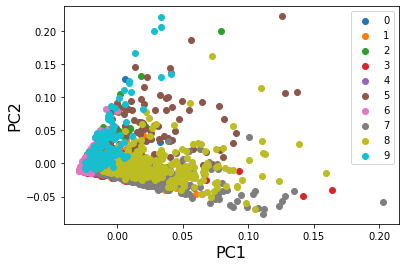

In [19]:
# ANSWER    

ax = PCA_cluster_plot(data_log, k10_labels)

#### Creating elbow method to find optimal k clusters

In [20]:
# create a DataFrame to store all the clusters
k_range = range(2, 51)
elbow_df = pd.DataFrame(index = percs_df.columns, 
                        columns = k_range)

# compute the clusters at each k
for k in k_range:
    
    # repeat code from problem 1.2.1
    k_clusters = cluster.KMeans(n_clusters = k, random_state = 1)
    k_clusters = k_clusters.fit(percs_df.T)
    
    # store in DataFrame
    elbow_df[k] = k_clusters.labels_

In [21]:
elbow_df

2   3   4   5   6   7   8   9   10  11  ...  41  42  43  44  45  46  \
OG        0   0   2   0   0   0   2   0   7   4  ...   0  14  16   9  13  40   
No.0      0   0   2   0   0   0   2   0   7   4  ...  22  38  39   0   7  32   
No.1      0   0   2   0   0   0   2   0   7   4  ...  22  38  39   0   7  32   
No.2      0   0   2   0   0   0   2   0   7   4  ...  37   0  28   8  28   8   
No.3      0   0   2   0   0   0   2   0   7   4  ...  37   0  28   8  28   8   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
No.4995   0   0   2   0   0   0   2   0   7   4  ...  17  11  16  18   0  40   
No.4996   0   0   2   0   0   0   2   0   7   4  ...  17  11  16  18   0   2   
No.4997   0   0   2   0   0   0   2   0   0   0  ...  25  15   8   9  13  22   
No.4998   0   0   2   0   0   0   2   0   7   4  ...   0  14  31  34  43  35   
No.4999   0   0   2   0   0   0   2   0   0   4  ...  25  15   8   9  13  22   

         47  48  49  50  
OG       40   6  39  38  
No.0     18  25  33  37  
No.1     18  25  33  37  
No.2      0  10  20   0  
No.3      0  10  20   0  
...      ..  ..  ..  ..  
No.4995  24  34  30   8  
No.4996  24  34  30   8  
No.4997  19   8  39  38  
No.4998  40   6   3  19  
No.4999  40   6  39  38  

[2001 rows x 49 columns]

Optimal K = 10


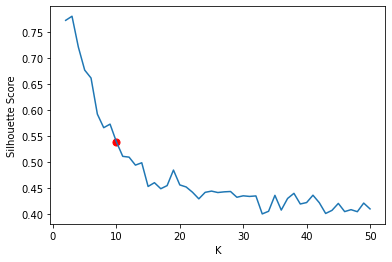

In [22]:
# compute the silhouette scores
k_silhouette = pd.Series(index = k_range, dtype=float)

for k in k_range:
    k_silhouette[k] = metrics.silhouette_score(percs_df.T, elbow_df[k])
    
# plot
fig, ax = plt.subplots()
ax.plot(k_range, k_silhouette)

# output, look at plot, and pick the best k
# I think it is k = 22
# so I'll draw it on now
best_k = 10
ax.scatter(best_k, k_silhouette[best_k], color = 'r', s = 50)
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')

print('Optimal K =', best_k)

try with more sample size,
possibly could smooth out above graph,
could export percs df as csv so i dont have to rerun it


In [23]:
# mean_silhouette = pd.Series(index = k_range, dtype=float)

# # increase this number to make the curve smoother
# # requires a lot of time to run
# num_repeats = 10

# for k in k_range:
#     k_scs = []
#     for i in range(num_repeats):
#         # DO NOT specify a random state so we intentionally 
#         # get different results
#         k_clusters = cluster.KMeans(n_clusters = k)
#         k_clusters = k_clusters.fit(percs_df.T)
        
#         # add this silhouette score
#         k_scs += [metrics.silhouette_score(percs_df.T, k_clusters.labels_)]
    
#     # take the mean silhouette score
#     mean_silhouette[k] = np.mean(k_scs)

In [24]:
# fig, ax = plt.subplots()
# ax.plot(k_range, mean_silhouette)
# ax.set_xlabel('K')
# ax.set_ylabel('Mean Silhouette Score')

# # this reduces our k slightly
# best_k = 21
# ax.scatter(best_k, mean_silhouette[best_k], color = 'r', s = 50)

In [25]:
# normalize the data
# data_norm = pd.DataFrame(stats.zscore(data_log, axis = 1), 
                        #  columns = data_log.columns, index = data_log.index)

data_norm = sklearn.preprocessing.normalize(percs_df,norm='l2')
data_norm= pd.DataFrame(data_norm)

In [26]:
data_norm = data_norm.T
data_norm.columns = [data_log.index]
# data_norm

In [27]:
data_vis = data_norm.melt()
data_vis.columns = ["RXN", "val"]
# data_vis

Overlaps of PERC values

In [28]:
data_vis

RXN       val
0       kf_HEX1  0.002602
1       kf_HEX1  0.000549
2       kf_HEX1  0.000379
3       kf_HEX1  0.000258
4       kf_HEX1  0.000294
...         ...       ...
28009  kf_NADHM  0.022355
28010  kf_NADHM  0.022355
28011  kf_NADHM  0.022355
28012  kf_NADHM  0.022355
28013  kf_NADHM  0.022355

[28014 rows x 2 columns]

In [29]:
import altair as alt

In [30]:
data_vis = data_norm.melt()
data_vis.columns = ["RXN", "val"]
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [31]:
fig = alt.Chart(data_vis).mark_circle(size= 100).encode(
    alt.X("RXN", axis=alt.Axis( tickCount=5), scale=alt.Scale(type='log')),
    alt.Y('val',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('RXN', scale=alt.Scale(scheme='turbo')), 
    tooltip=['RXN', "val"]
).properties(
    width=400,
    height=400).interactive()
fig

alt.Chart(...)

Make a violin plot for above^

could also log base 10 transform above df and then seeing dsitrubution


In [32]:
# Violin Plot of log transofmred data 
alt.Chart(data_vis_log).transform_density(
    'val',
    as_=['Value_column', 'density'],
    # extent=[-0.1, 0.1],
    groupby=['RXN']
).mark_area(orient='horizontal').encode(
    y=alt.Y(
        'Value_column:Q', scale=alt.Scale(type='log'),
                axis=alt.Axis(
            # labels=False, 
            # values=[0],
        grid=False,
         ticks=True)
        ),
    color='RXN:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    tooltip=['RXN:N', "Value_column:Q"], 
    column=alt.Column(
        'RXN:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=50
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).interactive()

alt.Chart(...)

In [33]:
# Violin Plot of percs distribution without log tranforming
alt.Chart(data_vis).transform_density(
    'val',
    as_=['Value_column', 'density'],  
    groupby=['RXN']
    ).mark_area(orient='horizontal').encode(
    y=alt.Y('Value_column:Q',axis=alt.Axis(grid=False,ticks=True)),
    color='RXN:N',
    x=alt.X('density:Q', stack='center',impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)),
        tooltip=['RXN:N', "Value_column:Q"], 
    column=alt.Column(
        'RXN:N',header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0))
).properties(
    width=50).configure_facet(spacing=0).configure_view(stroke=None).interactive()

alt.Chart(...)

In [34]:
pca = decomposition.PCA().fit(data_norm)

# get the two important matrices & label them in pandas
pc_genes = pd.DataFrame(pca.components_,
                        columns = data_norm.columns)
pc_samples = pd.DataFrame(pca.transform(data_norm),
                          index = data_norm.index)

# get the explained variance, which will be useful later
exp_var = pca.explained_variance_ratio_

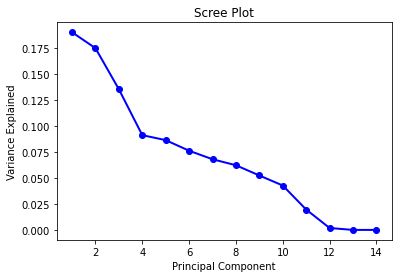

In [35]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Components to capture 80% of variance:  7


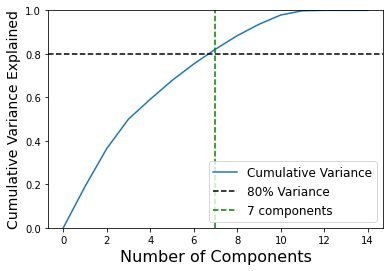

In [36]:
# get the cumulative variance
cum_var = exp_var.cumsum()

# find the number of components
index_80 = sum(cum_var <= 0.8)

# indices are zero-indexed, so the total number is one more than this
print('Components to capture 80% of variance: ', index_80+1)

# add a zero at the start so the plot extends all the way down
cum_var_plot = [0] + list(cum_var)

# plot
fig, ax = plt.subplots()
ax.plot(range(len(cum_var_plot)), cum_var_plot, label = 'Cumulative Variance')

# add some lines to illustrate the question
ax.axhline(0.8, color = 'k', linestyle = '--', label = '80% Variance')
ax.axvline(index_80+1, color = 'g', linestyle = '--', label = str(index_80+1)+ ' components')

# limit the y axes
ax.set_ylim([0, 1])

# axes labels and legend
ax.set_xlabel('Number of Components', fontsize = 16)
ax.set_ylabel('Cumulative Variance Explained', fontsize = 14)
_ = ax.legend(fontsize = 12)

In [37]:
cum_var

array([0.19001901, 0.36471514, 0.49993817, 0.59102913, 0.67733019,
       0.75344172, 0.82137475, 0.8835459 , 0.93585893, 0.97855222,
       0.99814594, 1.        , 1.        , 1.        ])

In [38]:
pca_red = decomposition.PCA(n_components = 4).fit(data_norm)
scores_pca = pca_red.transform(data_norm)

k means clustering with PCA

In [39]:
kmeans = cluster.KMeans(n_clusters = 22, init = 'k-means++', random_state = 42)
kmeans = kmeans.fit(scores_pca)

In [40]:
df_segm_pca_kmeans = pd.concat([data_norm, pd.DataFrame(scores_pca)], axis =1)
df_segm_pca_kmeans.columns.values[-4:] = ["Component 1", "Component 2", "Component 3", "Component 4"]

df_segm_pca_kmeans["segment kmeansPCA"] = kmeans.labels_


In [41]:
df_segm_pca_kmeans["Segment"] =  df_segm_pca_kmeans["segment kmeansPCA"].map({0:'1st', 
1:"2nd",
2: "3rd",
3: "4th",
4:"5th",
5:"6th",
6:"7th",
7:"8th",
8:"9th",
9:"10th",
10:"11th",
11:"12th",
12:"13th",
13:"14th",
14:"15th",
15:"16th",
16:"17th",
17:"18",
18:"19th",
19:"20th",
20:"21st",
21:"22nd",
22:"23rd"})

In [42]:
x_axis = df_segm_pca_kmeans["Component 2"]
y_axis = df_segm_pca_kmeans["Component 1"]

c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


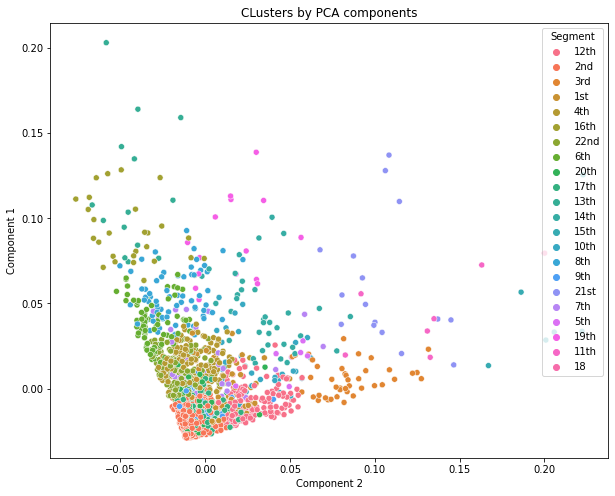

In [43]:
plt.figure(figsize= (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans["Segment"], 
# palette = ['g', 'r', 'c', 'm',]
)
plt.title("CLusters by PCA components")
plt.show()

look at eigenvalues, how many evals are needed for this much variance

Scree plot


keep the number of PCA componenets bewteen 3 and 5 tops
incerase samples, drive down the componenets

after the PCA--> elbow plot
k emans clustering--> elbow plot



In [44]:
df_st =  StandardScaler().fit_transform(percs_df.T)  
pd.DataFrame(df_st, columns=percs_df.T.columns).head(2)

RXN   kf_HEX1    kf_PGI  kf_FBP    kf_PFK    kf_FBA    kf_TPI   kf_GAPD  \
0   -0.341399  0.182761     0.0 -0.520604 -0.429763  0.352122 -0.006414   
1   -0.442888 -0.560206     0.0 -0.608759 -0.366436 -0.449606 -0.359832   

RXN    kf_PGK    kf_PGM    kf_ENO    kf_PYK  kf_LDH_L   kf_ATPM  kf_NADHM  
0   -0.361896  0.958080  1.109197 -0.460399 -0.187485 -0.426377       0.0  
1   -0.217455  0.830703  0.914496  0.320426 -0.362204 -0.756655       0.0

In [45]:
pca_out = PCA().fit(df_st)
pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = percs_df.T.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1           PC2           PC3           PC4           PC5  \
variable                                                                     
kf_HEX1   0.408725 -8.426590e-02 -1.658137e-01 -2.388243e-01  8.408388e-02   
kf_PGI    0.081228  2.116725e-02  2.203012e-01  7.684612e-01  3.000441e-02   
kf_FBP    0.000000 -2.602085e-17  1.110223e-16  5.551115e-17 -2.081668e-16   
kf_PFK    0.515653 -1.000149e-01  7.016028e-02  2.343331e-01 -2.262449e-02   
kf_FBA    0.008884  2.679263e-02 -4.953568e-02  3.321835e-01  6.696408e-01   
kf_TPI   -0.010975  1.348970e-02  3.097628e-01 -3.339343e-01  6.572997e-01   
kf_GAPD   0.054729  1.145757e-01  6.640499e-01 -1.295651e-01  4.736421e-02   
kf_PGK    0.426486  1.497011e-01  1.361976e-02  5.294360e-02 -8.766447e-02   
kf_PGM   -0.001051  6.442432e-01 -1.231354e-01  2.649899e-02  2.234413e-02   
kf_ENO   -0.001434  6.476269e-01 -1.175356e-01  4.155210e-02  1.318650e-02   
kf_PYK    0.222019  2.584238e-01 -1.816346e-01 -1.854124e-01  8.422433e-02   
kf_LDH_L  0.074241  1.873942e-01  5.615818e-01 -9.002341e-02 -3.044199e-01   
kf_ATPM   0.566176 -9.818882e-02 -4.641133e-02 -1.056388e-01  2.625610e-02   
kf_NADHM  0.000000  0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00   

                   PC6           PC7           PC8           PC9  \
variable                                                           
kf_HEX1  -1.629180e-01 -4.645160e-01 -3.871623e-01 -3.758335e-01   
kf_PGI    4.011216e-01 -9.493100e-02 -2.300159e-01 -2.296112e-01   
kf_FBP    2.498002e-16 -2.220446e-16  2.220446e-16 -5.551115e-17   
kf_PFK    1.081999e-01 -9.668493e-02  1.452149e-01  1.802928e-01   
kf_FBA   -6.251097e-01  1.802037e-01 -9.037691e-02  2.066323e-02   
kf_TPI    4.533865e-01 -1.598800e-02  2.761955e-01 -2.749818e-01   
kf_GAPD  -8.838809e-02 -1.648663e-01 -2.486177e-01  6.026562e-01   
kf_PGK   -6.784726e-02  4.497266e-01  4.777103e-01 -4.724852e-05   
kf_PGM    4.369373e-03 -2.456299e-01  7.377118e-02  2.620322e-02   
kf_ENO   -1.173753e-03 -2.197187e-01  1.146998e-01  6.055072e-03   
kf_PYK    2.916061e-01  5.795962e-01 -6.071726e-01  8.110161e-02   
kf_LDH_L -3.256442e-01  1.967165e-01 -6.819234e-02 -5.595581e-01   
kf_ATPM  -3.187575e-02 -1.430444e-01  9.865943e-02  1.178129e-01   
kf_NADHM -0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00   

                  PC10          PC11          PC12          PC13  PC14  
variable                                                                
kf_HEX1  -3.573785e-01  2.702781e-01  3.070800e-03 -1.519960e-17   0.0  
kf_PGI   -2.191612e-01 -1.713891e-01  6.608561e-03  1.229030e-16   0.0  
kf_FBP   -2.220446e-16 -3.330669e-16 -2.029626e-16 -1.000000e+00   0.0  
kf_PFK    5.517221e-01  5.335388e-01 -6.592683e-03 -1.549910e-16   0.0  
kf_FBA    7.662240e-02 -1.676231e-02 -1.541517e-03 -2.339536e-17   0.0  
kf_TPI    4.224393e-02  2.619061e-02  2.276800e-03  4.558692e-18   0.0  
kf_GAPD  -2.479649e-01  4.858001e-02 -6.254140e-03 -1.432239e-16   0.0  
kf_PGK   -5.715847e-01  1.440469e-01  5.002956e-02  8.756609e-17   0.0  
kf_PGM    8.643104e-02 -2.773948e-02  7.027547e-01 -1.330545e-16   0.0  
kf_ENO    3.052004e-02  7.391401e-03 -7.088059e-01  1.737985e-16   0.0  
kf_PYK    1.136649e-01  8.762846e-03 -1.623766e-02 -2.388638e-16   0.0  
kf_LDH_L  2.774110e-01 -6.134962e-02  2.056413e-03  1.170622e-16   0.0  
kf_ATPM   1.603815e-01 -7.643106e-01 -2.856618e-02  1.769785e-16   0.0  
kf_NADHM  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00   1.0

Generated correlation matrix plot for loadings

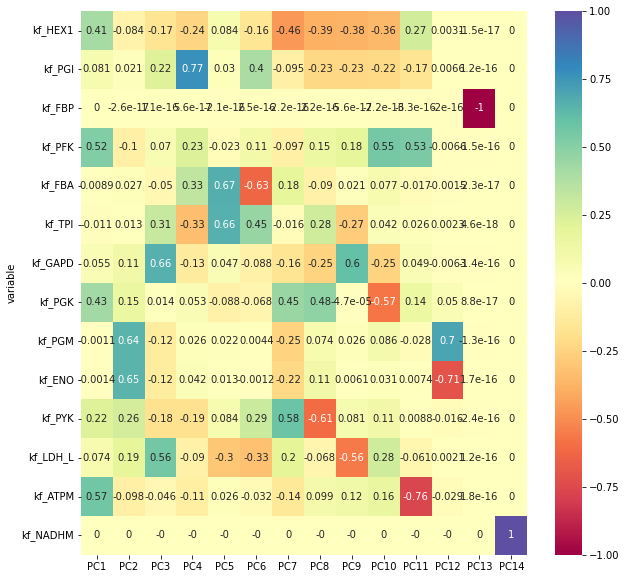

In [31]:
plt.figure(figsize= (10,10))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')

plt.show()

Next steps:
possibly removing NADHM, add sinks and sources
see differences bw PC 2/3

change conc flexbilties
variation, see convergence

potentially see sample sizes, and 
make sure fluxes and conc units align (b4 presnetnig)




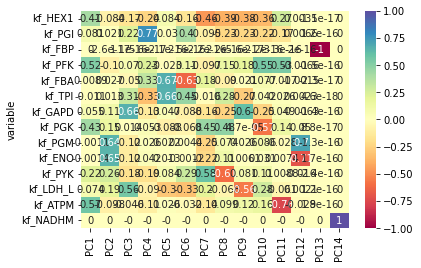

In [29]:

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

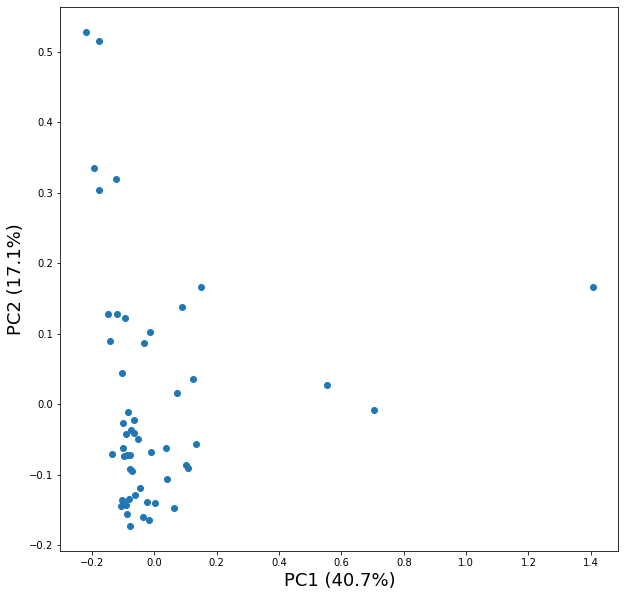

In [ ]:
# ANSWER
pc1 = pc_genes.loc[0].to_frame('weight')
pc2 = pc_genes.loc[1].to_frame('weight')

# need the absolute values to sort by
pc1['abs_weight'] = pc1.weight.abs()
pc2['abs_weight'] = pc2.weight.abs()

# sort and keep only the top 5
pc1 = pc1.sort_values('abs_weight', ascending = False).iloc[0:5]
pc2 = pc2.sort_values('abs_weight', ascending = False).iloc[0:5]

# concatenate the gene table info
# pc1 = pd.concat([pc1, gene_table.loc[pc1.index]], axis = 1)
# pc2 = pd.concat([pc2, gene_table.loc[pc2.index]], axis = 1)
fig, ax = plt.subplots(figsize = (10, 10))

# scatter the sample loadings
ax.scatter(pc_samples[0], pc_samples[1])

# add the labels, use the exp_var
ax.set_xlabel('PC1 (%.1f%%)'%(exp_var[0]*100), fontsize = 18)
ax.set_ylabel('PC2 (%.1f%%)'%(exp_var[1]*100), fontsize = 18)

# add the arrows
# begin by getting the genes from 1.3.1
# arrows_to_make = pc1.index.append(pc2.index)

# # this would get crowded, so remove specific genes that overlap
# arrows_to_make = arrows_to_make.drop(['b3361','b3519', 'b0948', 'b3411'])

# arrow length variable extends arrows to help in interpreting the plot
# text_scale determines how far text labels are from arrow tips (1 = on top of them)
arrow_length = 500
text_scale = 1.3

# the place the arrows start is up to you, so you can move it out of the way
start1 = 25
start2 = 40

# loop through each gene and add its arrow
# for g in arrows_to_make:
#     # directions in PC1 and 2
#     g_weight_pc1 = pc_genes.loc[0, g]
#     g_weight_pc2 = pc_genes.loc[1, g]
    
#     # lengthen arrow by a constant factor
#     g_weight_pc1 = g_weight_pc1 * arrow_length
#     g_weight_pc2 = g_weight_pc2 * arrow_length
    
#     # add the arrow
#     ax.arrow(start1, start2, g_weight_pc1, g_weight_pc2, head_width = 2)
    
#     # add the gene's name to the plot
#     g_name = gene_table.gene_name[g]
#     ax.text(start1 + (text_scale * g_weight_pc1),
#             start2 + (text_scale * g_weight_pc2), 
#             g_name)

looking for correlation, 
larger- negatively
smaller- positively
90- indepenedt
so therefore looking at how much weight each perc has
can we see if specific percs 
is there a specific perc(s) that can be attributed to a specific component
look at atatching loadings on PC1, theire wieghts


Set-up plots, to identify what the dots are 
make moseouver using altair
3d--> plotly

make something to pull up omcponenets?

colour the points absed on subsystem

increase the number of sample points

### Next Steps:
1) looking at overlaps of Perc values
2) 

1) Plot a 45 deg line on above graph, make a line for 0,0
